# (Ford GoBike System Data)
## by (Fahad Almalik)

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?


### What is/are the main feature(s) of interest in your dataset?

trip duration, start station name, end station name, user type, birth year and bike share
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [42]:
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id              197
start_station_name            197
start_station_latitude          0
start_station_longitude         0
end_station_id                197
end_station_name              197
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          183412
member_gender                8265
bike_share_for_all_trip         0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [10]:
df['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [23]:
len(df['start_station_name'].unique())

330

In [24]:
len(df['end_station_name'].unique())

330

In [30]:
df['member_birth_year'].value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
1992.0     8250
1987.0     8018
1986.0     7973
1994.0     7660
1995.0     7423
1985.0     7028
1984.0     6562
1983.0     5954
1980.0     5024
1982.0     4990
1996.0     4640
1981.0     4345
1979.0     3756
1997.0     3481
1998.0     3208
1978.0     2830
1977.0     2725
1974.0     2633
1999.0     2528
1975.0     2503
1976.0     2442
1973.0     2080
1968.0     1928
1971.0     1924
1972.0     1909
          ...  
1954.0      301
1952.0      189
1951.0      180
1950.0      178
1953.0      158
1947.0      135
1955.0      134
1945.0      105
1949.0       99
1931.0       89
1900.0       53
1948.0       51
2001.0       34
1943.0       30
1942.0       21
1933.0       20
1946.0       19
1902.0       11
1939.0       11
1941.0        9
1901.0        6
1938.0        3
1920.0        3
1934.0        2
1944.0        2
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year,

> First, I'll clean the columns that I'll be using in my analysis.

In [3]:
df = df[df['member_birth_year'].notna()]

In [4]:
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [5]:
df = df[df['member_gender'].notna()]

In [13]:
# Get ages by subtracting start time by the birth year
df['start_time'] = pd.to_datetime(df['start_time'])
df['age'] = df['start_time'].dt.year - df['member_birth_year']

In [14]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,36
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,30
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,31
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,27
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.4350,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996,Female,Yes,23


## Univariate Exploration 

### Question1: What is the distribution of male/female bikers?

In [26]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

### Visualization:

Text(0,0.5,'Number of bikers')

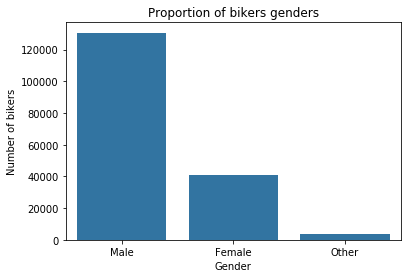

In [101]:
col = sb.color_palette()[0]
order = df['member_gender'].value_counts().index
sb.countplot(data = df, x = 'member_gender', color = col, order = order);
plt.title("Proportion of bikers genders");
plt.xlabel('Gender');
plt.ylabel('Number of bikers');

Text(0.5,1,'Proportion of bikers genders')

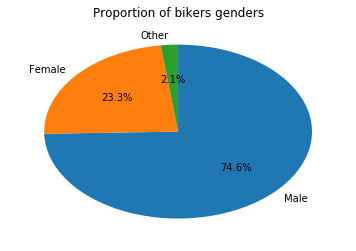

In [102]:
plt.pie(df['member_gender'].value_counts(), labels = order, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title("Proportion of bikers genders");

### Observation: 

We can see that around 13000 out of 175147bikers are male, which represents 74.6% of bikers, 4000 are female (23.3%) , males represents a large proportion of the bikers

### Question2: What is the distribution of bikers ages? 

### Visulization:

In [56]:
df['member_birth_year'].nunique()

75

Text(0,0.5,'Number of bikers')

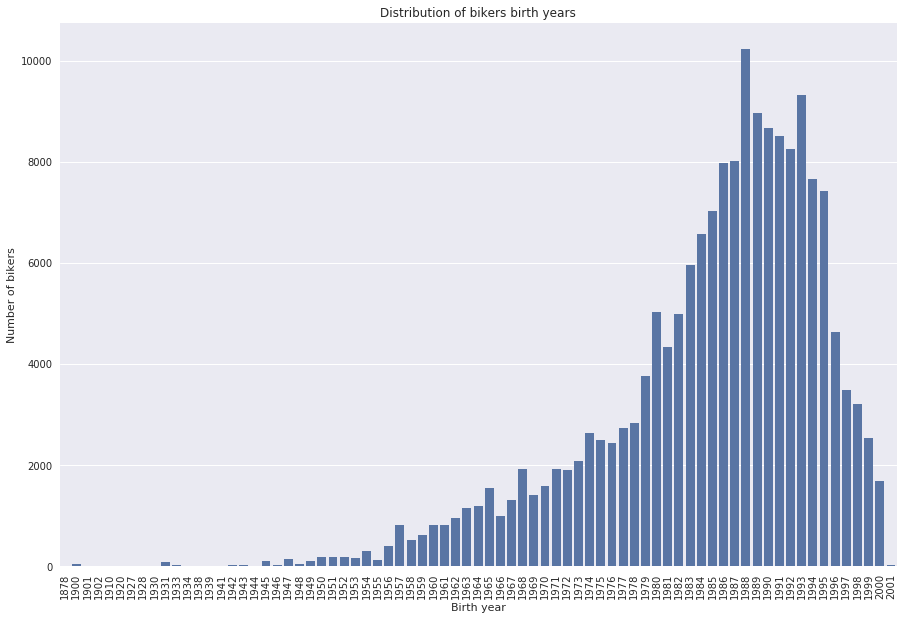

In [104]:
t = df['member_birth_year'].sort_values()
sb.set(rc={'figure.figsize':(15,10)})
col = sb.color_palette()[0]
a = sb.countplot(data = df, x = 'member_birth_year', color = col);
plt.xticks(rotation=90);
plt.title("Distribution of bikers birth years");
plt.xlabel('Birth year');
plt.ylabel('Number of bikers');

As you see, we have 75 different birth years for bikers, it's hard to see the years that most number of bikers were born in, but the point to take from this plot is to know that most of the bikers were born after 1960, but that's not enough, let's see the most 20 years that bikers were born in

Text(0,0.5,'Number of bikers')

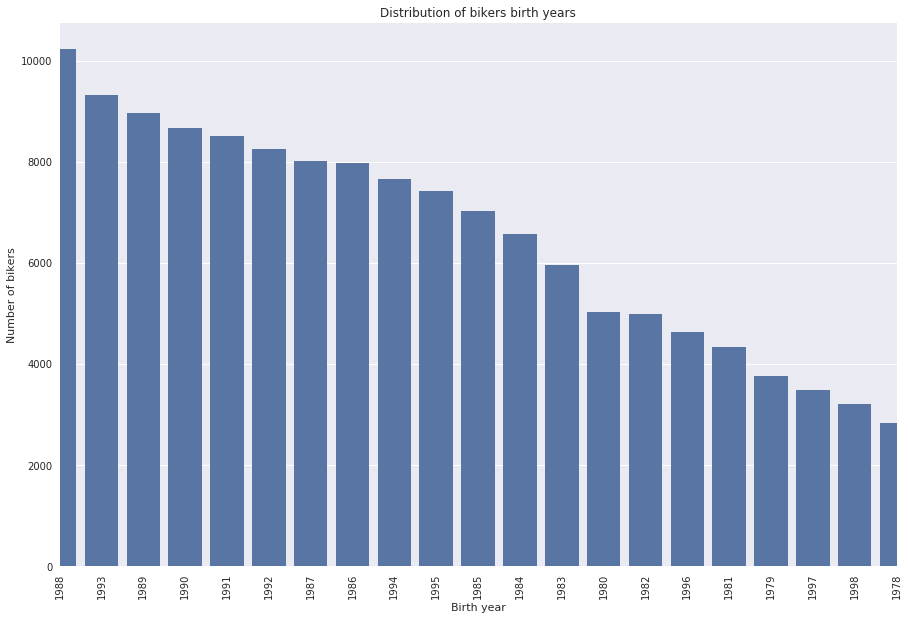

In [103]:
sb.set(rc={'figure.figsize':(15,10)})
col = sb.color_palette()[0]
order = df['member_birth_year'].value_counts().index[:21]
a = sb.countplot(data = df, x = 'member_birth_year', color = col, order  = order);
plt.xticks(rotation=90);
a.set_xlim(0, 20)
plt.title("Distribution of bikers birth years");
plt.xlabel('Birth year');
plt.ylabel('Number of bikers');

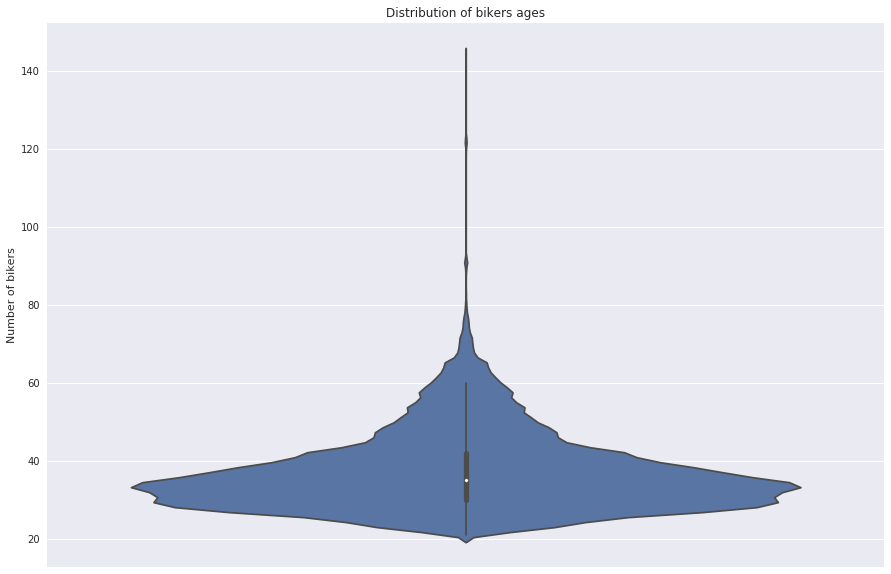

In [105]:
sb.violinplot( data = df, y = 'age');
plt.title("Distribution of bikers ages");
plt.ylabel('Number of bikers');

### Observation:

it turns out the the majority of bikers were born between 1978 and 1998, most of bikers are around 30 to 40 years old.

### Quaestion3: What is the proportion of bikers type ( Customer / Subscriber ) ? 

### Visulization:

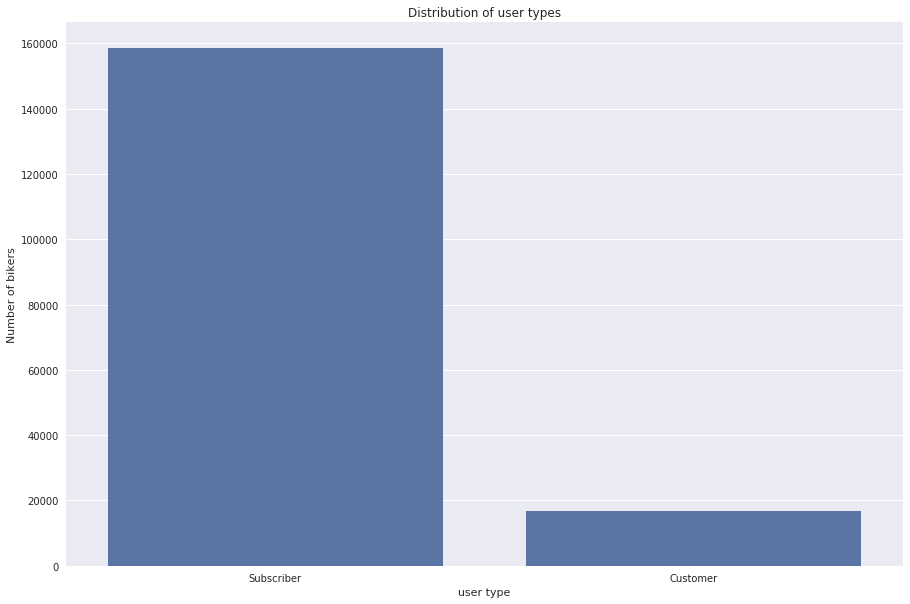

In [106]:
col = sb.color_palette()[0]
order = df['user_type'].value_counts().index
sb.countplot(data = df, x = 'user_type', color = col, order = order);
plt.title("Distribution of user types");
plt.xlabel('user type');
plt.ylabel('Number of bikers');

### Observation:

it turns out that around 16000 of bikers are subscriber bikers, That's a huge number comparing to Customers whom are less than 2000

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I didn't see unusual points or plots that needed to be transformed

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to do some cleaning operations in 'member_birth_year' and 'member_gender', since they contained null values and I used them in my analysis, I had to remove the rows that included null values in those columns.

> I also changes the datatype of 'member_birth_year' from float to int since it's doesn't make since to have a birth year in decimals.

## Bivariate Exploration

### Question4: Is there a correlation between trip duration and biker age? 

### Visulization:

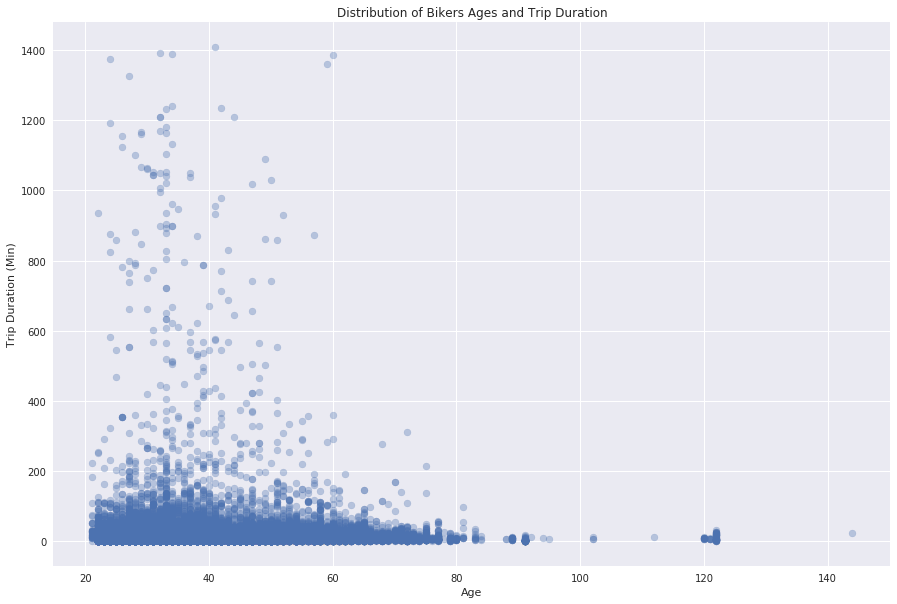

In [120]:
plt.scatter(data = df, x = 'age', y = 'duration_min', alpha = 1/3);
plt.title("Distribution of Bikers Ages and Trip Duration");
plt.xlabel('Age');
plt.ylabel('Trip Duration (Min)');

### Observation:

To better understand the plot, I calcuated each biker's age by subtracting 2022 (current year) from the birth year. I also calculated the trip duration in minutes which gives us a better understanding.


There's a clear negative correlation between trip duration and age, meaning the older the biker the less time he/she would take on a trip, I didn't expect that!

### Question5: Does gender effects trip duration? 

### Vizulization:

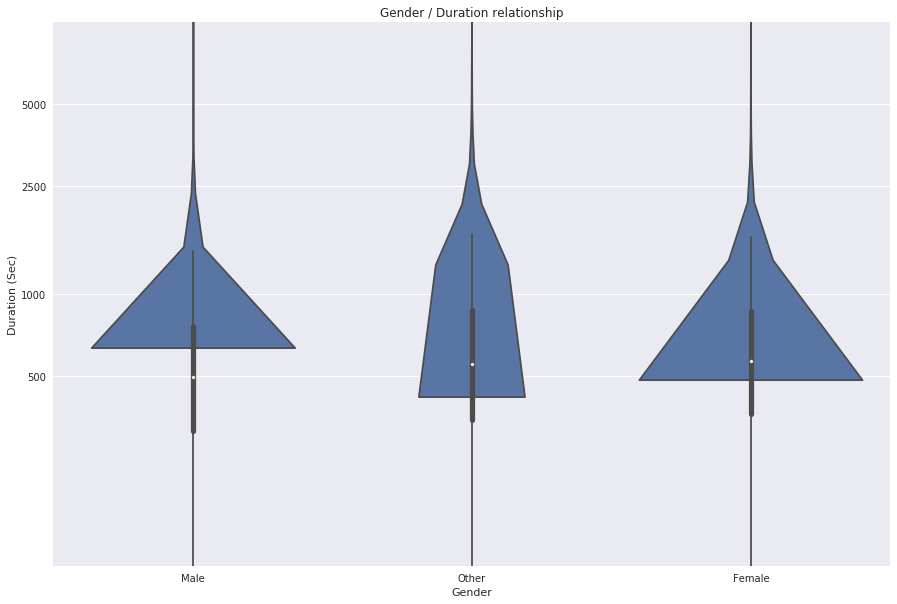

In [119]:
col = sb.color_palette()[0]
a = sb.violinplot(data = df, x='member_gender' , y='duration_sec', color = col);

# get the log of Y to make the plot easier to deal with the highly skewed plot
plt.yscale('log')
y_ticks = [500, 1000, 2500, 5000]
a.set(yticks = y_ticks, yticklabels = y_ticks);
plt.ylim(100, 10000);
plt.title("Gender / Duration relationship");
plt.xlabel('Gender');
plt.ylabel('Duration (Sec)');

since it's hard to interpret trip duration in seconds, I'll get trip duration in minutes for all the records and display it in the next graph.

I'll use boxplot since it's easier to understand than the violin plot

In [38]:
df['duration_min'] = df['duration_sec'] / 60

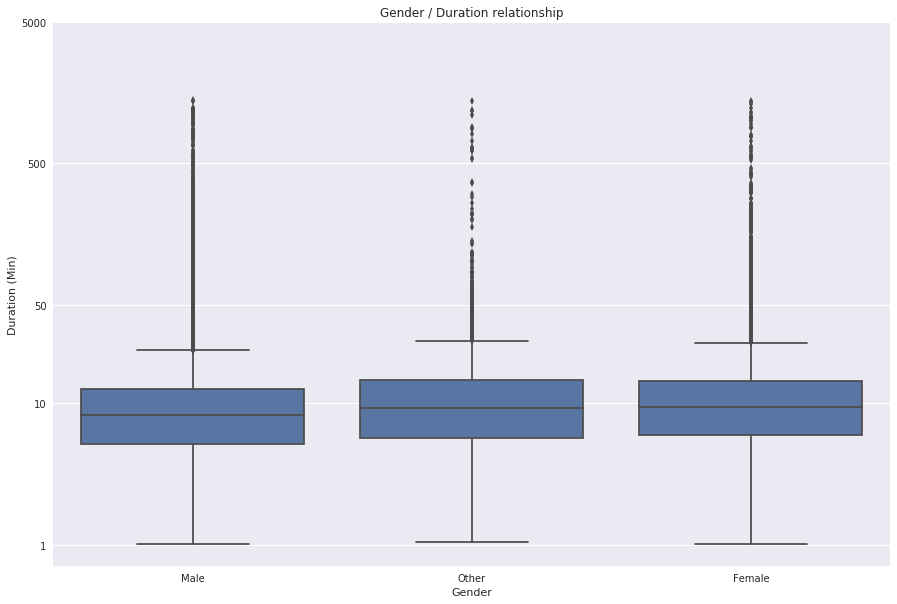

In [118]:
col = sb.color_palette()[0]
a = sb.boxplot(data = df, x='member_gender' , y='duration_min', color = col);

# get the log of Y to make the plot easier to deal with the highly skewed plot
plt.yscale('log')
y_ticks = [1, 10, 50,500, 5000]
a.set(yticks = y_ticks, yticklabels = y_ticks);
plt.title("Gender / Duration relationship");
plt.xlabel('Gender');
plt.ylabel('Duration (Min)');

### Observation:

There doesn't seem to be a relationship between trip duration and gender, All genders seems to have same median, there seems to be lots of outliers in all genders.

### Question6: What are the proportion of ages and genders?

### Visulizarion:

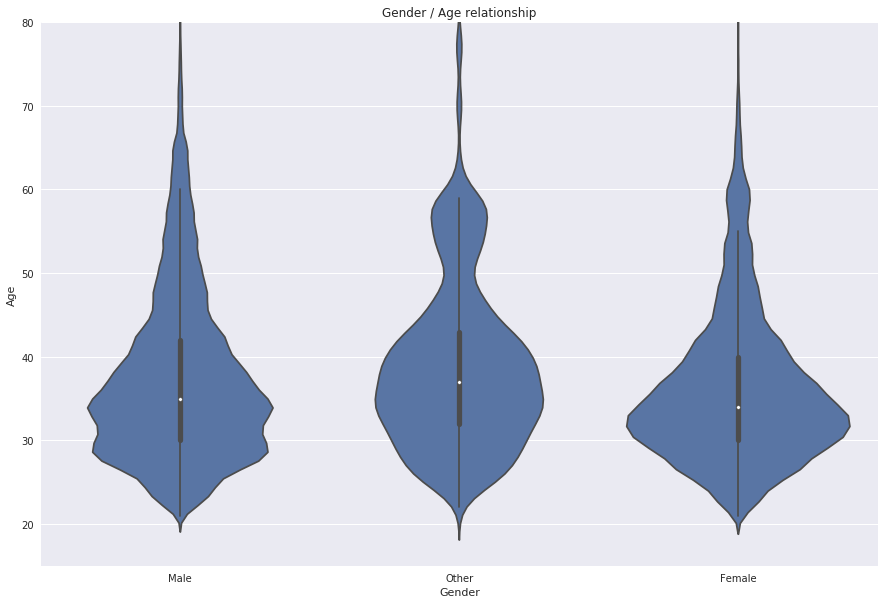

In [124]:
col = sb.color_palette()[0]
sb.violinplot(data = df, x = 'member_gender', y = 'age', color = col);
plt.ylim(15,80)
plt.title("Gender / Age relationship");
plt.xlabel('Gender');
plt.ylabel('Age');

### Observations:

We can see that males are the oldest on average, the majority of bikers in all genders are between 20 to 40.

### Question7:  Does user type have an effect on trip duration? 

### Vizulization:

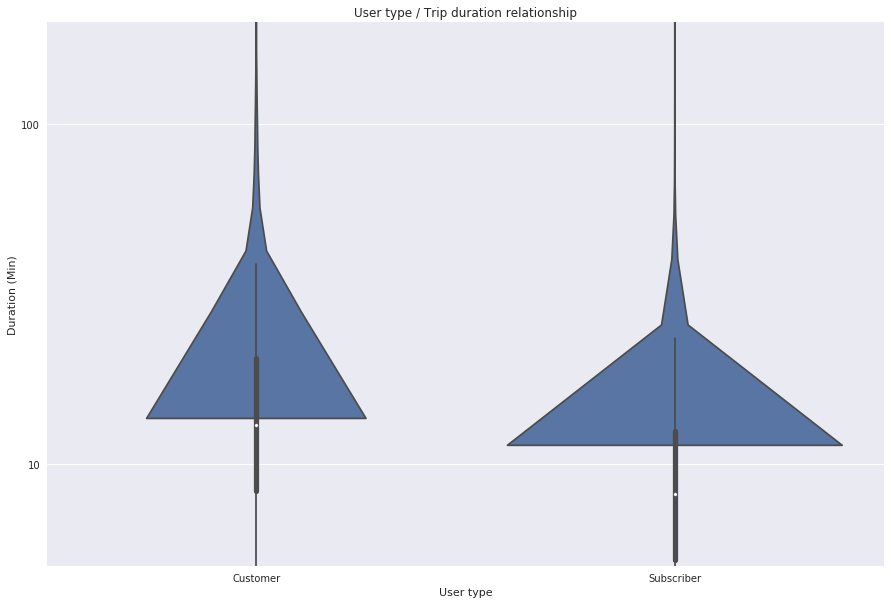

In [137]:
col = sb.color_palette()[0]
a = sb.violinplot(data = df, x='user_type' , y='duration_min', color = col);
# get the log of Y to make the plot easier to deal with the highly skewed plot
plt.yscale('log')
y_ticks = [0.1, 10, 100, 1000]
a.set(yticks = y_ticks, yticklabels = y_ticks);
plt.ylim(5, 200);
plt.title("User type / Trip duration relationship");
plt.xlabel('User type');
plt.ylabel('Duration (Min)');

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


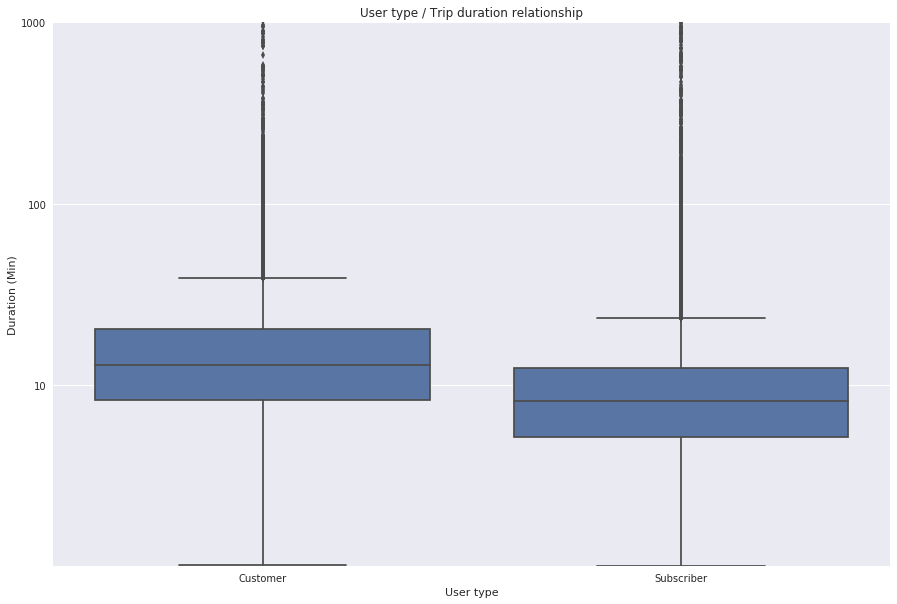

In [136]:
col = sb.color_palette()[0]
a = sb.boxplot(data = df, x='user_type' , y='duration_min', color = col);
# get the log of Y to make the plot easier to deal with the highly skewed plot
plt.yscale('log')
y_ticks = [0.1, 10, 100, 1000]
a.set(yticks = y_ticks, yticklabels = y_ticks);
plt.ylim(0, 1000);
plt.title("User type / Trip duration relationship");
plt.xlabel('User type');
plt.ylabel('Duration (Min)');

### Observation:

in general, Customers tends to hive a higher median, that implies that customers takes longer trips than subscribers.

### Question8: What is the proportion of gender and age? 

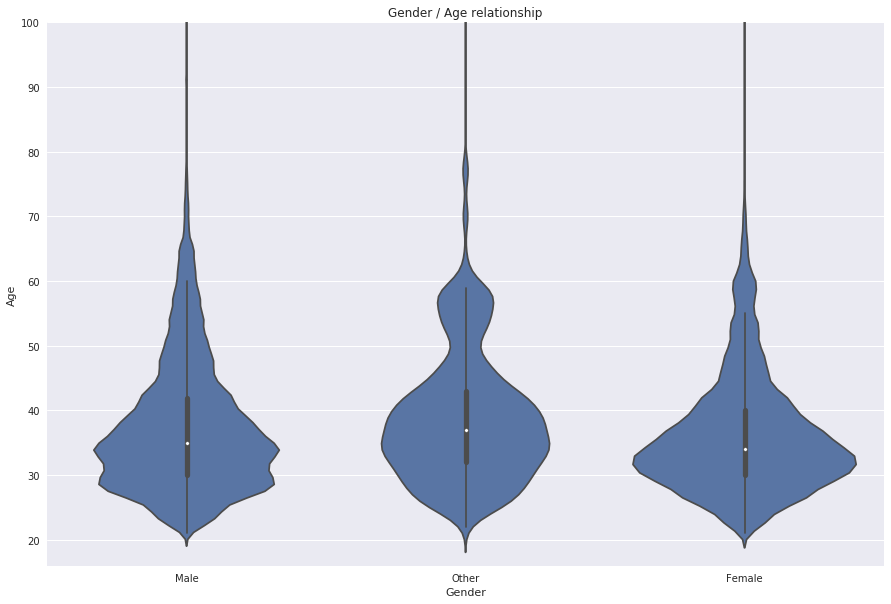

In [130]:
col = sb.color_palette()[0]
sb.violinplot(data = df, x='member_gender' , y='age', color = col);
plt.ylim(df['age'].min() - 5, 100)
plt.title("Gender / Age relationship");
plt.xlabel('Gender');
plt.ylabel('Age');

### Observation: 

Males seems to be older than females with a slight difference, but the long tail tells us that females has more outliers than males.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Old bikers seems to have less trip duration than younger bikers!, That shocked me.
> I compared between the genders and trip duration but there doesn't seem to be that much of a difference between males and females in terms of trip duration.
> comparing in age, males seems to be older than females on average, whereas females has more outliers

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customers tends to have longer trip duration than subscribers

## Multivariate Exploration

### Question9: How does trip duration varies between genders and age?

### Vizualization:

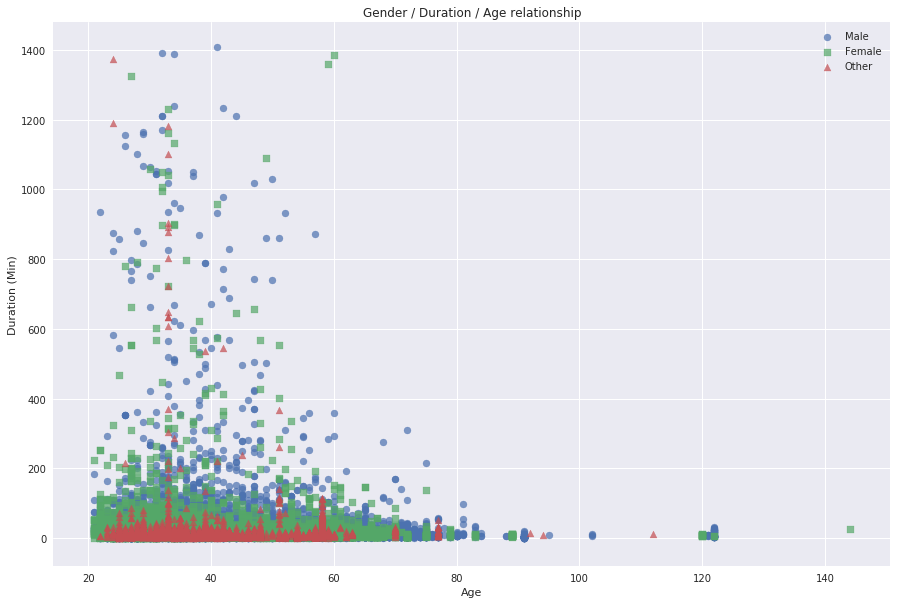

In [135]:
gender_markers = [['Male', 'o'],
               ['Female', 's'],
              ['Other', '^']]

for gender, marker in gender_markers:
    df_gender = df[df['member_gender'] == gender]
    plt.scatter(data = df_gender, x = 'age', y = 'duration_min', marker = marker, alpha = 0.7);
plt.legend(['Male','Female', 'Other']);
plt.xlabel('Age');
plt.ylabel('Duration (Min)');
plt.title('Gender / Duration / Age relationship');

### Observation:

Overall, males seems to have longer trips than females, There seems to be a negative correlation between age and trip duration in all genders, meaning, the older the biker, the shorter the trip duration

### Question10: Does age varies between Gender and user type?

### Visulization:

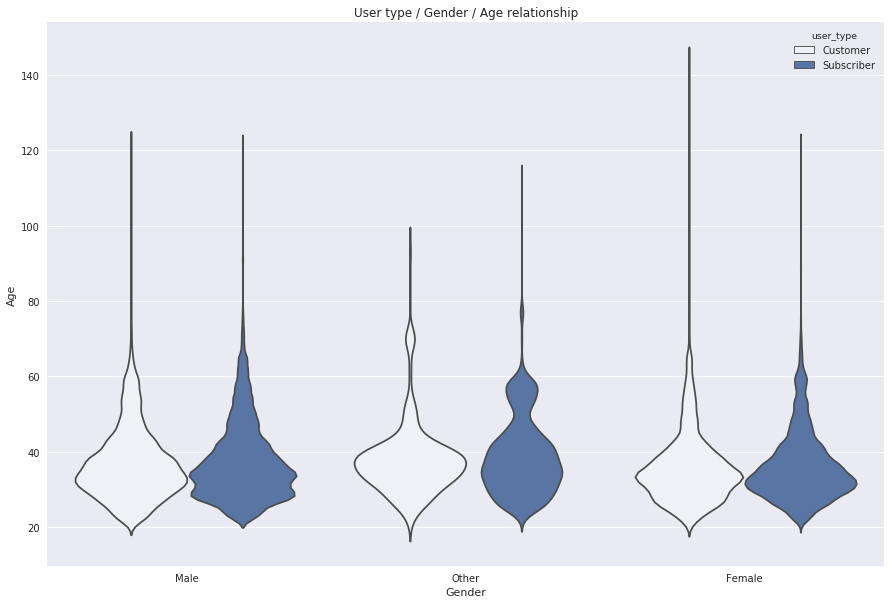

In [133]:
col = sb.color_palette()[0]
sb.violinplot(data = df, x='member_gender' , y='age', color = col, hue = 'user_type', inner = None);
plt.title("User type / Gender / Age relationship");
plt.xlabel('Gender');
plt.ylabel('Age');

### Observations:

Males seems to have an equal number of Customers and Subscribers, so does Females, Whereas Other genders have more Subscribers than Customers.

Males and Other genders seems to be older than Females.

### Question11: Does Trip duration varies between Gender and user type?

### Visulization:

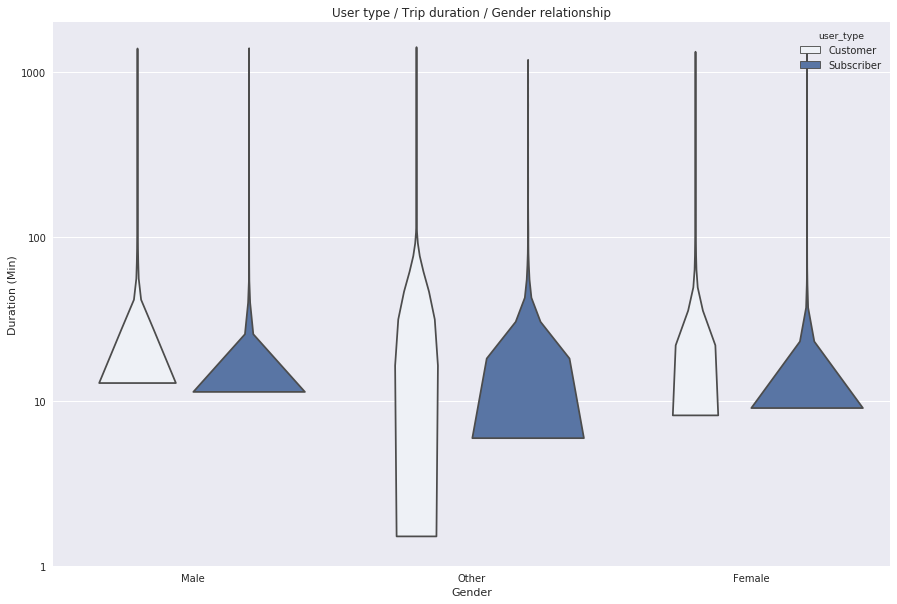

In [134]:
col = sb.color_palette()[0]
a = sb.violinplot(data = df, x='member_gender' , y='duration_min', color = col, hue = 'user_type', inner = None);

# get the log of Y to make the plot easier to deal with the highly skewed plot
plt.yscale('log')
y_ticks = [1, 10, 100, 1000]
a.set(yticks = y_ticks, yticklabels = y_ticks);
plt.title("User type / Trip duration / Gender relationship");
plt.xlabel('Gender');
plt.ylabel('Duration (Min)');

### Observation:

It's so clear that Other gender in all types seems to have shorter trips, whereas males has a slightly longer trips than females, and Customer males seems to have longer trips than Subscriber males.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> the older the biker, the shorter the trip duration
> Males seems to be older than Females.
> and Customer males seems to have longer trips than Subscriber males.

### Were there any interesting or surprising interactions between features?

> Males seems to have an equal number of Customers and Subscribers, so does Females, Whereas Other genders have more Subscribers than Customers.
> Overall, males seems to have longer trips than females

## Conclusions

> To sumarize, I've loaded Ford GoBike System Dataset, before I started to analyze it I made some cleaning operations to make it valid to use in my analysis, After I cleaned the dataset and made it ready to use, I've started to analyze it by creating an exploratory visuals and communicated my findings by transforming the exploratory visuals into an explonatory visuals that can be understood by readers, I mmade the transformation by adding title and labels for X and Y axis, And by setting the ranges of X and Y axis for some plots to make the plot easy to see.